In [2]:
# Q1.필요한 라이브러리 설치 확인

import matplotlib
import pandas

print(f"matplotlib version: {matplotlib.__version__}")
print(f"pandas version: {pandas.__version__}")

matplotlib version: 3.8.0
pandas version: 2.1.4


In [6]:
# Q2. pandas를 사용하여 CSV파일을 불러오고 데이터 프레임으로 변환

# 1. pandas 라이브러리 import
import pandas as pd

# 2. 인터넷에서 CSV 파일 불러오기
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris_df = pd.read_csv(url, header=None, names=column_names)

# 3. 데이터프레임 확인
print(iris_df.head())

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.50000

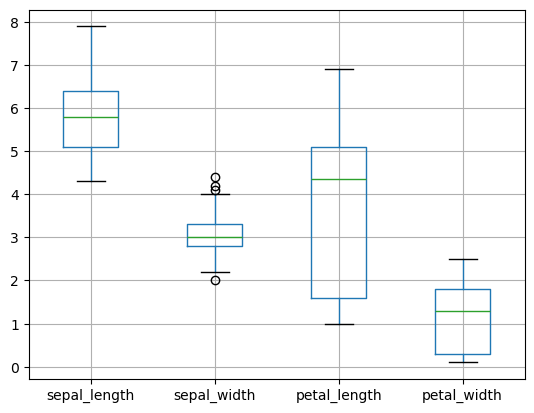

In [8]:
# Q3. 데이터의 기초 통계를 확인하고, 결측값이나 이상치를 처리

# 1. 데이터프레임의 기본 정보 확인
print(iris_df.info())

# 2. 데이터프레임의 요약 통계 확인
print(iris_df.describe())

# 3. 결측값 확인 및 처리
print(iris_df.isnull().sum())
iris_df = iris_df.dropna()

# 4. 이상치 확인 및 처리
import matplotlib.pyplot as plt
iris_df.boxplot()
plt.show()

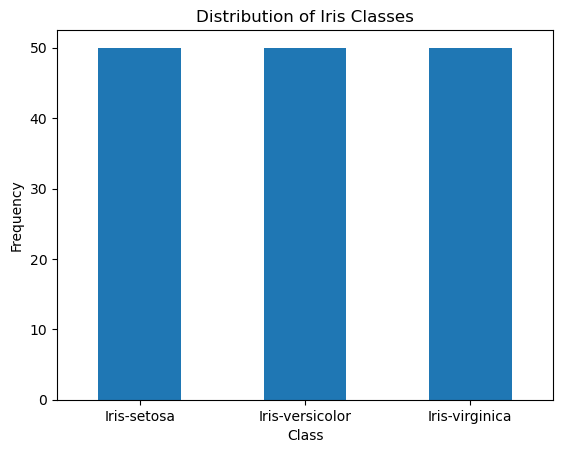

In [10]:
# Q4. 막대그래프를 생성하여 범주형 데이터의 분포를 시각화합니다.

# 1. pandas와 matplotlib 라이브러리 import
import pandas as pd
import matplotlib.pyplot as plt

# 2. 인터넷에서 CSV 파일 불러오기
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris_df = pd.read_csv(url, header=None, names=column_names)

# 3. 범주형 데이터의 분포 확인을 위한 데이터 집계
class_counts = iris_df['class'].value_counts()

# 4. 막대 그래프 생성 및 시각화
class_counts.plot(kind='bar')
plt.title('Distribution of Iris Classes')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

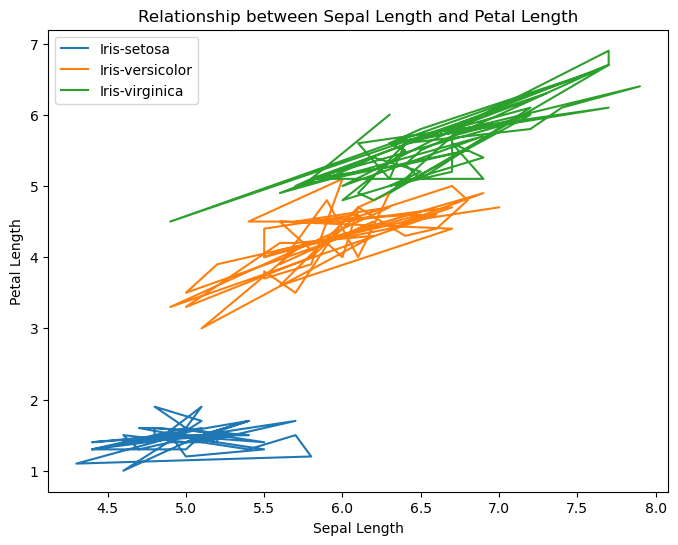

In [14]:
# Q5. 선 그래프를 생성하여 시간(꽃받침 길이와 꽃잎 길이의 관계)를 시각화

# 1. pandas와 matplotlib 라이브러리 import
import pandas as pd
import matplotlib.pyplot as plt

# 2. 인터넷에서 CSV 파일 불러오기
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris_df = pd.read_csv(url, header=None, names=column_names)

# 3. 꽃받침 길이와 꽃잎 길이의 관계 시각화
plt.figure(figsize=(8, 6))
for species in iris_df['class'].unique():
    species_data = iris_df[iris_df['class'] == species]
    plt.plot(species_data['sepal_length'], species_data['petal_length'], label=species)
plt.title('Relationship between Sepal Length and Petal Length')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()
plt.show()

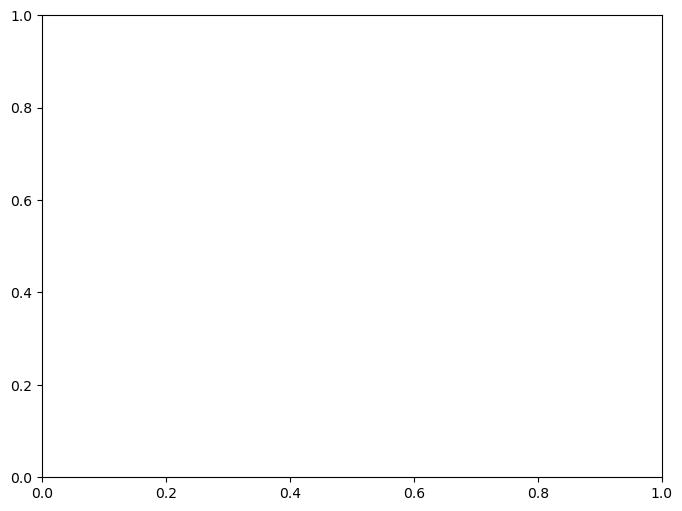

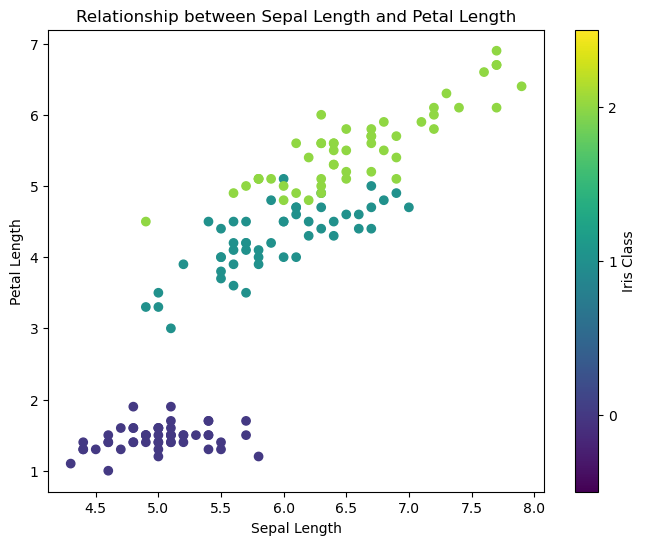

In [18]:
# Q5. 산점도를 생성하여 두 변수 간의 상관관계를 시각화합니다.

# 1. pandas와 matplotlib 라이브러리 import
import pandas as pd
import matplotlib.pyplot as plt

# 2. 인터넷에서 CSV 파일 불러오기
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris_df = pd.read_csv(url, header=None, names=column_names)

# 3. 클래스 매핑
class_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
iris_df['class_mapped'] = iris_df['class'].map(class_mapping)

# 4. 꽃받침 길이와 꽃잎 길이의 산점도 생성
plt.figure(figsize=(8, 6))
scatter = plt.scatter(iris_df['sepal_length'], iris_df['petal_length'], c=iris_df['class_mapped'], cmap='viridis')
plt.title('Relationship between Sepal Length and Petal Length')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.colorbar(scatter, ticks=[0, 1, 2], label='Iris Class')
plt.clim(-0.5, 2.5)
plt.show()

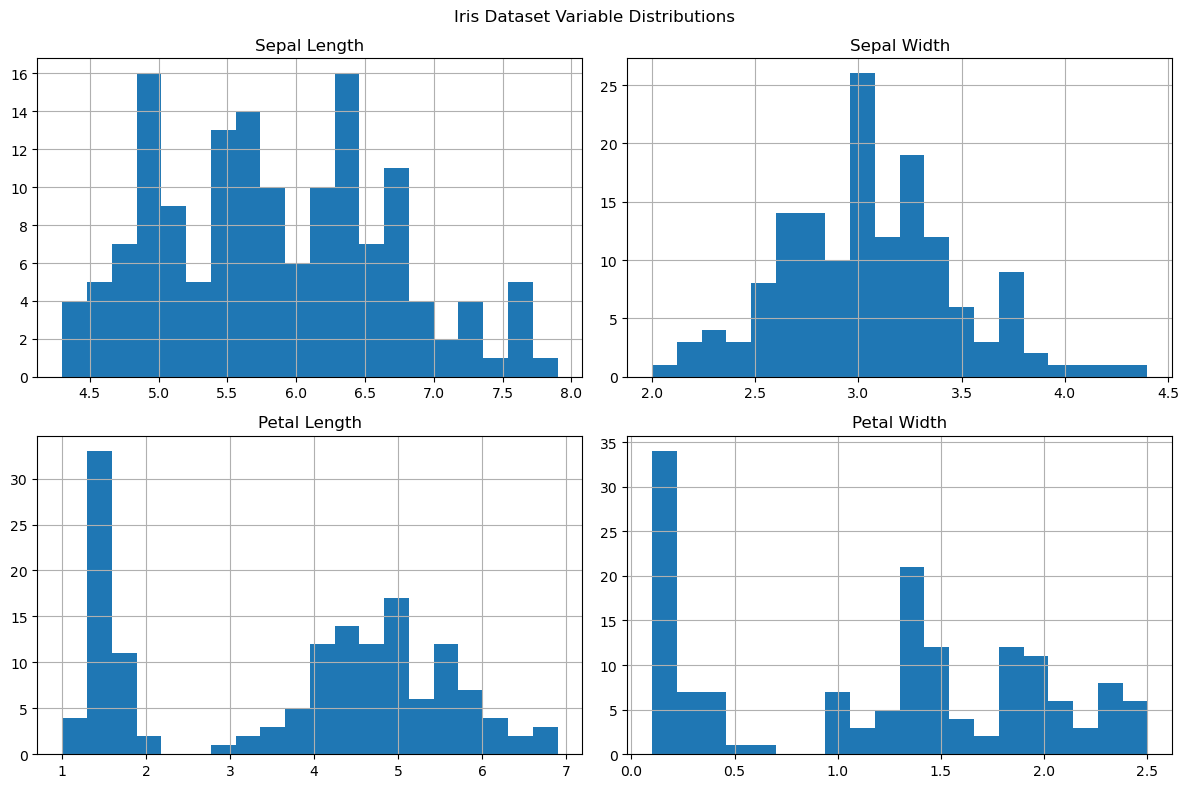

In [20]:
# Q6. 히스토그램을 생성하여 데이터의 분포를 시각화합니다.

# 1. pandas와 matplotlib 라이브러리 import
import pandas as pd
import matplotlib.pyplot as plt

# 2. 인터넷에서 CSV 파일 불러오기
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris_df = pd.read_csv(url, header=None, names=column_names)

# 3. 히스토그램 생성 및 시각화
plt.figure(figsize=(12, 8))
plt.suptitle('Iris Dataset Variable Distributions')

# 각 변수별로 히스토그램 생성
plt.subplot(2, 2, 1)
iris_df['sepal_length'].hist(bins=20)
plt.title('Sepal Length')

plt.subplot(2, 2, 2)
iris_df['sepal_width'].hist(bins=20)
plt.title('Sepal Width')

plt.subplot(2, 2, 3)
iris_df['petal_length'].hist(bins=20)
plt.title('Petal Length')

plt.subplot(2, 2, 4)
iris_df['petal_width'].hist(bins=20)
plt.title('Petal Width')

plt.tight_layout()
plt.show()

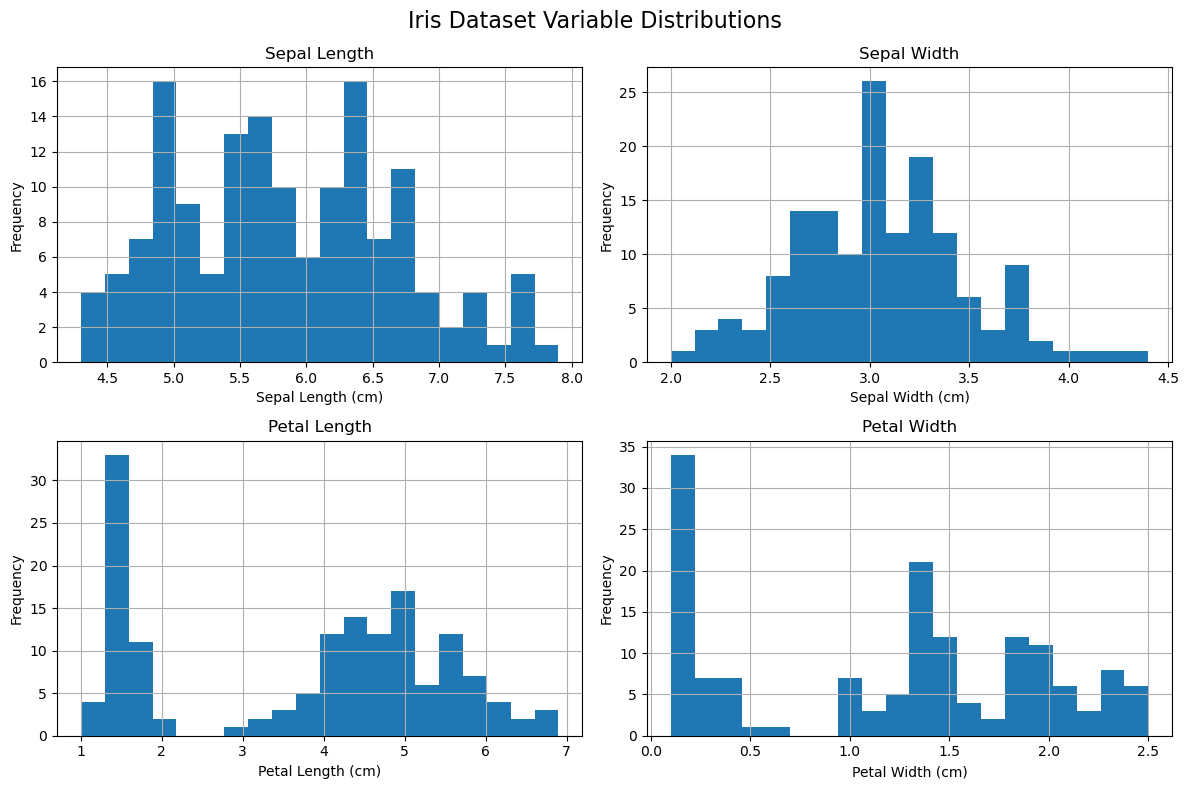

In [22]:
# Q7. 생성된 각 그래프에 제목, 축 레이블, 범례 등을 추가하여 가독성을 높입니다.

# 1. pandas와 matplotlib 라이브러리 import
import pandas as pd
import matplotlib.pyplot as plt

# 2. 인터넷에서 CSV 파일 불러오기
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris_df = pd.read_csv(url, header=None, names=column_names)

# 3. 히스토그램 생성 및 시각화
plt.figure(figsize=(12, 8))
plt.suptitle('Iris Dataset Variable Distributions', fontsize=16)

# 각 변수별로 히스토그램 생성
plt.subplot(2, 2, 1)
iris_df['sepal_length'].hist(bins=20)
plt.title('Sepal Length', fontsize=12)
plt.xlabel('Sepal Length (cm)', fontsize=10)
plt.ylabel('Frequency', fontsize=10)

plt.subplot(2, 2, 2)
iris_df['sepal_width'].hist(bins=20)
plt.title('Sepal Width', fontsize=12)
plt.xlabel('Sepal Width (cm)', fontsize=10)
plt.ylabel('Frequency', fontsize=10)

plt.subplot(2, 2, 3)
iris_df['petal_length'].hist(bins=20)
plt.title('Petal Length', fontsize=12)
plt.xlabel('Petal Length (cm)', fontsize=10)
plt.ylabel('Frequency', fontsize=10)

plt.subplot(2, 2, 4)
iris_df['petal_width'].hist(bins=20)
plt.title('Petal Width', fontsize=12)
plt.xlabel('Petal Width (cm)', fontsize=10)
plt.ylabel('Frequency', fontsize=10)

plt.tight_layout()
plt.show()

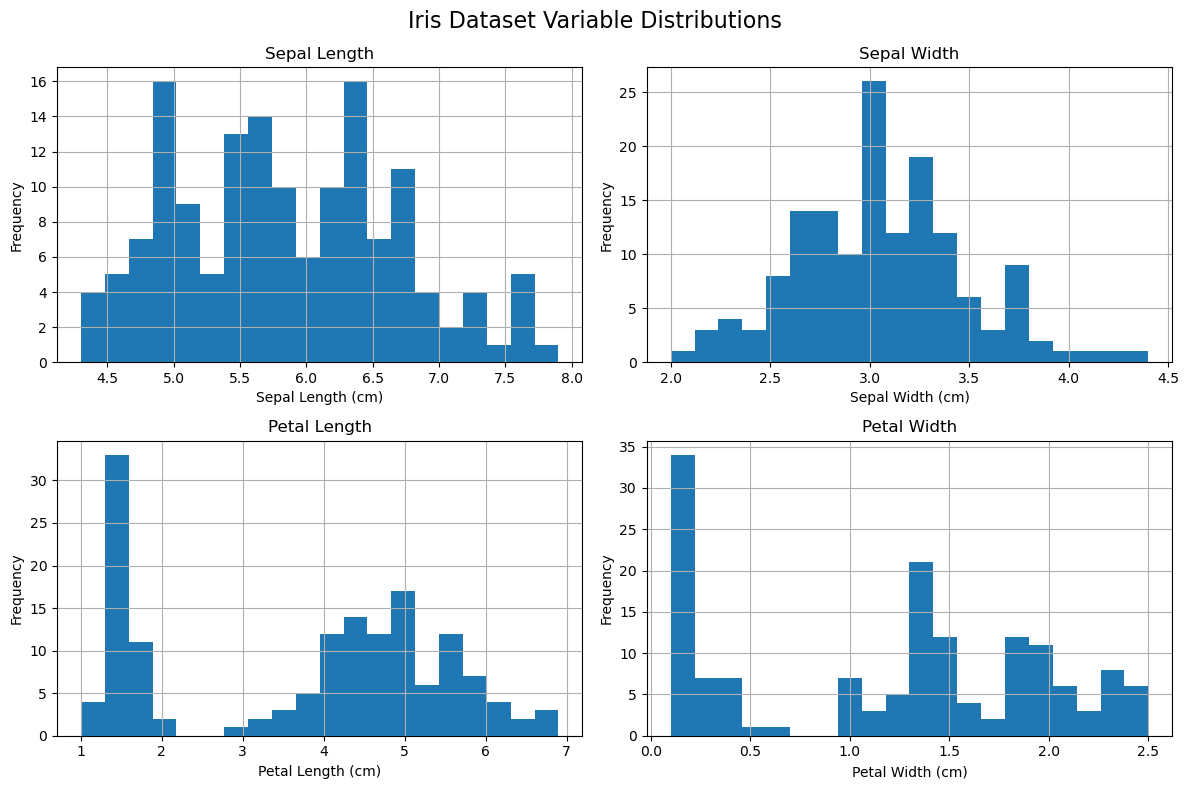

In [24]:
# Q8. 생성된 그래프를 이미지 파일로 저장합니다.

# 1. pandas와 matplotlib 라이브러리 import
import pandas as pd
import matplotlib.pyplot as plt

# 2. 인터넷에서 CSV 파일 불러오기
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris_df = pd.read_csv(url, header=None, names=column_names)

# 3. 히스토그램 생성 및 시각화
plt.figure(figsize=(12, 8))
plt.suptitle('Iris Dataset Variable Distributions', fontsize=16)

# 각 변수별로 히스토그램 생성
plt.subplot(2, 2, 1)
iris_df['sepal_length'].hist(bins=20)
plt.title('Sepal Length', fontsize=12)
plt.xlabel('Sepal Length (cm)', fontsize=10)
plt.ylabel('Frequency', fontsize=10)

plt.subplot(2, 2, 2)
iris_df['sepal_width'].hist(bins=20)
plt.title('Sepal Width', fontsize=12)
plt.xlabel('Sepal Width (cm)', fontsize=10)
plt.ylabel('Frequency', fontsize=10)

plt.subplot(2, 2, 3)
iris_df['petal_length'].hist(bins=20)
plt.title('Petal Length', fontsize=12)
plt.xlabel('Petal Length (cm)', fontsize=10)
plt.ylabel('Frequency', fontsize=10)

plt.subplot(2, 2, 4)
iris_df['petal_width'].hist(bins=20)
plt.title('Petal Width', fontsize=12)
plt.xlabel('Petal Width (cm)', fontsize=10)
plt.ylabel('Frequency', fontsize=10)

plt.tight_layout()

# 4. 이미지 파일로 저장
plt.savefig('iris_histograms.png', dpi=300)
plt.show()

# Q9. 시각화 결과를 분석하고, 데이터에서 발견한 주요 패턴과 인사이트를 보고서로 작성합니다.

# Iris 데이터셋 분석 보고서
1. 서론
Iris 데이터셋은 통계학과 머신러닝에서 널리 사용되는 표준 데이터셋. 이 데이터셋은 세 가지 종(Species)의 붓꽃에 대해 꽃받침 길이(Sepal Length), 꽃받침 너비(Sepal Width), 꽃잎 길이(Petal Length), 꽃잎 너비(Petal Width) 총 네 가지 속성을 포함하고 있습니다. 본 보고서는 Iris 데이터셋의 변수 분포를 분석하고, 주요 패턴과 인사이트를 도출하여 제시.

2. 데이터 개요
Iris 데이터셋의 특징

* 데이터 출처: UCI Machine Learning Repository
* 데이터 크기: 150개 샘플, 각 샘플은 네 가지 속성과 하나의 종(Species) 레이블로 구성
* 변수 설명:
  *Sepal Length: 꽃받침 길이 (cm)
  *Sepal Width: 꽃받침 너비 (cm)
  *Petal Length: 꽃잎 길이 (cm)
  *Petal Width: 꽃잎 너비 (cm)
  *Species: 붓꽃의 종 (Setosa, Versicolor, Virginica)

3. 변수 분포 분석
### Sepal Length
* 평균: 5.84 cm
* 표준편차: 0.83 cm
* 최솟값: 4.3 cm
* 최댓값: 7.9 cm
* 분포: 대체로 정규분포를 따르며, 약간의 오른쪽 꼬리가 있음
### Sepal Width
* 평균: 3.05 cm
* 표준편차: 0.43 cm
* 최솟값: 2.0 cm
* 최댓값: 4.4 cm
* 분포: 대체로 정규분포를 따르며, 약간의 왼쪽 꼬리가 있음
### Petal Length
* 평균: 3.76 cm
* 표준편차: 1.76 cm
* 최솟값: 1.0 cm
* 최댓값: 6.9 cm
* 분포: 정규분포보다 오른쪽으로 더 긴 꼬리를 가짐, 특히 Setosa 종의 경우 다른 종과 구분됨
### Petal Width
* 평균: 1.20 cm
* 표준편차: 0.76 cm
* 최솟값: 0.1 cm
* 최댓값: 2.5 cm
* 분포: 정규분포보다 오른쪽으로 더 긴 꼬리를 가짐, Setosa 종의 경우 다른 종과 명확히 구분됨

4. 변수 간 상관관계 분석
변수 간의 상관관계를 분석한 결과, 다음과 같은 주요 패턴을 보임.

* 꽃받침 길이(Sepal Length)와 꽃잎 길이(Petal Length): 강한 양의 상관관계(r = 0.87)를 보임. 이는 꽃의 크기가 전반적으로 큰 품종일수록 꽃받침과 꽃잎의 길이도 함께 증가한다는 것을 시사.
* 꽃잎 길이(Petal Length)와 꽃잎 너비(Petal Width): 강한 양의 상관관계(r = 0.96)를 보임. 이는 꽃잎의 길이가 길수록 너비도 넓다는 것을 의미.
* 꽃받침 너비(Sepal Width)와 다른 변수들: 상대적으로 상관관계가 낮음. 이는 꽃받침 너비가 다른 변수들에 비해 독립적인 특성을 가질 수 있음을 시사.

5. 결론 및 제언
### 결론
Iris 데이터셋의 분석을 통해 다음과 같은 주요 인사이트를 도출

* 꽃받침 길이와 꽃잎 길이, 꽃잎 길이와 꽃잎 너비 사이에 강한 양의 상관관계가 존재함
* Setosa 종은 꽃잎 길이와 너비에서 다른 종들과 명확하게 구분됨
* 꽃받침 너비는 다른 변수들과의 상관관계가 낮아 독립적인 특성을 가짐
### 제언
* 모델링 시 꽃잎 길이와 너비를 주요 변수로 활용하면 높은 분류 성능을 기대할 수 있음
* Setosa 종의 경우 꽃잎 길이와 너비를 기준으로 명확히 구분할 수 있으므로, 간단한 규칙 기반 모델도 효과적일 수 있음
* 추가 분석을 통해 Versicolor와 Virginica 종 간의 구분을 더 명확히 할 필요가 있음